In [2]:
#hide
from icecream import ic
import sys, re

def jupyter(*args): 
    print(*[re.sub(r",\s{1,}", ", ", i.replace(",\n", ", ")) for i in args], file=sys.stdout)
    
ic.configureOutput(prefix='ic> ', outputFunction=jupyter)

# Python Data Structures & Types

## Data Types

In [ ]:
### int

In [ ]:
### float

In [ ]:
### str

In [38]:
### bytes

### `struct.Struct`

structured data as bytes 

In [36]:
# Struct
# https://docs.python.org/3/library/struct.html
from struct import Struct

MyStruct = Struct('i?f')
compact_data = MyStruct.pack(23, False, 42.0)
ic(compact_data)
# and unpacking
ic(MyStruct.unpack(compact_data))

ic> compact_data: b'\x17\x00\x00\x00\x00\x00\x00\x00\x00\x00(B'
ic> MyStruct.unpack(compact_data): (23, False, 42.0)


(23, False, 42.0)

## Dictionary and Maps

### `dict`


**Talks**:

* [Modern Python Dictionaries - A confluence of a dozen great ideas (PyCon 2017)](https://www.youtube.com/watch?v=npw4s1QTmPg) by Raymond Hettinger

In [25]:
ys={'z':9, 'y':1, 'x':5}
xs={'a':1, 'b':3, 'c':2}
ic(xs)

# Merging Dictionaries
# pre python 3.5
ic(dict(xs, **ys))

# post python 3.5
ic({**xs, **ys})

ic> xs: {'a': 1, 'b': 3, 'c': 2}
ic> dict(xs, **ys): {'a': 1, 'b': 3, 'c': 2, 'x': 5, 'y': 1, 'z': 9}
ic> {**xs, **ys}: {'a': 1, 'b': 3, 'c': 2, 'x': 5, 'y': 1, 'z': 9}


{'a': 1, 'b': 3, 'c': 2, 'z': 9, 'y': 1, 'x': 5}

### `collections.OrderedDict`

In [30]:
# Ordered Dict

# in python 3.7 order will be preserved, 
# but it's depends on dict implementation
# see Hettinger's video.
a = {'a':1, 'b':3, 'c':2}
ic(a)

# ordered dict helps to keep it really ordered
from collections import OrderedDict
b = OrderedDict(a)
ic(b)

# we also can use sorted to sort doctionary by value
s1 = sorted(a.items(), key=lambda x: x[1])
ic(s1)

# or by key
s2 = sorted(a.items(), key=lambda x: x[0])
ic(s2)

#  or usign comprehension
s3 = {k:v for k, v in sorted(a.items(), key=lambda x: x[1], reverse=False)}
ic(s3)

ic> a: {'a': 1, 'b': 3, 'c': 2}
ic> b: OrderedDict([('a', 1), ('b', 3), ('c', 2)])
ic> s1: [('a', 1), ('c', 2), ('b', 3)]
ic> s2: [('a', 1), ('b', 3), ('c', 2)]
ic> s3: {'a': 1, 'b': 3, 'c': 2}


{'a': 1, 'c': 2, 'b': 3}

### `collections.ChainMap`

In [32]:
from collections import ChainMap
from collections import defaultdict as DefaultDict

# default options
default_options = dict({
    'option':'default_value'
})

# options from default dict
custom_source = DefaultDict(lambda:"default_dictionaly_option_placeholder")
custom_source['option'] = 'default_dict_option'

options_source = ChainMap(default_options, custom_source)

ic(options_source['option'])
ic(options_source['nosuchoptions'])


# merging dictionaries
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
 
ic({**ChainMap(d1, d2)})

ic> options_source['option']: 'default_value'
ic> options_source['nosuchoptions']: 'default_dictionaly_option_placeholder'
ic> {**ChainMap(d1, d2)}: {'a': 1, 'b': 2, 'c': 3, 'd': 4}


{'c': 3, 'd': 4, 'a': 1, 'b': 2}

### `collections.defaultdict`

In [28]:
import collections 

my_dict = {}

# default value (for value that not exists) is list
ic(my_dict.get('key_that_not_exists', []))

# with default dictionary
ic(collections.defaultdict(list)['key_that_not_exists'])

ic> my_dict.get('key_that_not_exists', []): []
ic> collections.defaultdict(list)['key_that_not_exists']: []


[]

### `types.MappingProxyType`

* https://www.python.org/dev/peps/pep-0416
* https://docs.python.org/3/library/types.html

In [42]:
from types import MappingProxyType

Colors = MappingProxyType({
    'red'  : '#FF0000',
    'green': '#008000',
})

# show colors
ic(Colors)

# unexisting key
ic(Colors.get('navy'))

# updating keys (shoudl fail)
error_message = "Cant Update frozen/proxy value of dictionary"
try:
    Colors.update({'navy':'#000080'})
except AttributeError:
    ic(error_message)

ic> Colors: mappingproxy({'red': '#FF0000', 'green': '#008000'})
ic> Colors.get('navy'): None
ic> error_message: 'Cant Update frozen/proxy value of dictionary'


## Lists and Arrays

### `list`

### `bytes`

`immutable` bytes sequence

In [41]:
b = b'literal'
# bytes literal - restricted to ascii symbols (except \ and control codes)
ic(b)

# int (code at ascii) if indexing 
ic(b[1])

# int (code at ascii) if indexing 
ic(b[0:3])

# bytes to string convertion (with escape characters)
ic(b'dots over \xd1\x96'.decode())

# creating sequence qith zero value
ic(bytes(10))

# if initializer sequence of integers ...
ic(bytes(range(97, 97+26)))

# or sequence of utf8 aswell.
ic(bytes("dots over і", 'utf8'))

ic> b: b'literal'
ic> b[1]: 105
ic> b[0:3]: b'lit'
ic> b'dots over \xd1\x96'.decode(): 'dots over і'
ic> bytes(10): b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
ic> bytes(range(97, 97+26)): b'abcdefghijklmnopqrstuvwxyz'
ic> bytes("dots over і", 'utf8'): b'dots over \xd1\x96'


b'dots over \xd1\x96'

### `bytearray`

`mutable` bytes seqence

In [ ]:
# Same way to initialize it was done with byte
ic(bytearray())
ic(bytearray(4))
ic(bytearray("Dots over і.", 'utf8'))

# Mutating array
b = bytearray("Dots over і.", 'utf8')
b.extend(bytes('I said put dots over i.', 'utf8'))
ic(b)

b[0:5] = b'Comas '
ic(b)

# bytes supports strings like opperations
words = b"Dont comes easy"

# text transform
ic(words.upper())

# text split to list
ic(words.split())

# and join it back
ic(bytearray(b" ").join(words.split()))

### `array.array`

`C`- types arrays

In [40]:
# https://docs.python.org/3/library/array.html
from array import array 

# Unicode (Py_UNICODE)
ic(array('u', 'hello \u2641'))

# signed long
ic(array('l', (1, 2, 3, 4, 5)))

# doubles
ic(array('d', (1.0, 2.0, 3.14)))

# floats 
ic(array('f', (1.0, 1.5, 2.0, 2.5)))

ic> array('u', 'hello \u2641'): array('u', 'hello ♁')
ic> array('l', (1, 2, 3, 4, 5)): array('l', [1, 2, 3, 4, 5])
ic> array('d', (1.0, 2.0, 3.14)): array('d', [1.0, 2.0, 3.14])
ic> array('f', (1.0, 1.5, 2.0, 2.5)): array('f', [1.0, 1.5, 2.0, 2.5])


array('f', [1.0, 1.5, 2.0, 2.5])

## Linked Lists, Heaps and Queues

### `heapq`

In [24]:
import heapq

# priority queue realization using heapqueue
class PriorityQueue(object):
    def __init__(self):
        self._q = []

    def add(self, value, priority=0):
        heapq.heappush(self._q, (priority, value))

    def pop(self):
        return heapq.heappop(self._q)[-1]
    
pq = PriorityQueue()
pq.add("hello", priority=2)
pq.add("world", priority=1)
ic(pq.pop())
ic(pq.pop())

ic> pq.pop(): 'world'
ic> pq.pop(): 'hello'


'hello'

In [ ]:
### `queue.PriorityQueue`

### `queue.deque`

In [34]:
import collections 

d = collections.deque(["one", "two", "three"])
ic(d)
 
d.append("four")
ic(d)

ic(d.remove("three"))
ic(d)

d.extend(["dva", "try", "chotyry"])
ic(d)

d.extendleft(["iti", "ni", "san", "si"])
ic(d)


d.appendleft("zero")
ic(d)

d_poped = d.pop()
ic(d_poped)

d_popedleft = d.popleft()
ic(d_popedleft)

# rotatiob
ic(d)
d.rotate(2)
ic(d)

ic> d: deque(['one', 'two', 'three'])
ic> d: deque(['one', 'two', 'three', 'four'])
ic> d.remove("three"): None
ic> d: deque(['one', 'two', 'four'])
ic> d: deque(['one', 'two', 'four', 'dva', 'try', 'chotyry'])
ic> d: deque(['si', 'san', 'ni', 'iti', 'one', 'two', 'four', 'dva', 'try', 'chotyry'])
ic> d: deque(['zero', 'si', 'san', 'ni', 'iti', 'one', 'two', 'four', 'dva', 'try', 'chotyry'])
ic> d_poped: 'chotyry'
ic> d_popedleft: 'zero'
ic> d: deque(['si', 'san', 'ni', 'iti', 'one', 'two', 'four', 'dva', 'try'])
ic> d: deque(['dva', 'try', 'si', 'san', 'ni', 'iti', 'one', 'two', 'four'])


deque(['dva', 'try', 'si', 'san', 'ni', 'iti', 'one', 'two', 'four'])

## Sets

### `set`

In [39]:
s = set([1,2,1,2,3,1])
ic(s)

s.add(19)
s.add(19)
ic(s)

# intersection
ic(s & set([2, 19]))

ic> s: {1, 2, 3}
ic> s: {19, 1, 2, 3}
ic> s & set([2, 19]): {2, 19}


{2, 19}

In [ ]:
### `frozenset`

### `collections.Counter`

In [3]:
# collections.Counter example

from collections import Counter

c0 = Counter({'uno':1, 'dos':2});
ic(c0)

c1 = Counter(uno=1)
ic(c1)

c2 = Counter();
c2['apples'] += 1
c2['apples'] += 2
c2['peaches'] += 10

# Most Common Elements (sorted by `count`)
ic(c2.most_common())

# Counter Example
c3 = Counter()
lipsum = "Un dos tres quatro cinco seis siete"
words = [w.strip(".,") for w in lipsum.lower().split(' ')]   
for word in words:
    c3[word]+=1

ic(c3.most_common(2))

# List
ic(list(c3.elements()))

# Unique Elements
ic(list(c3))

# Additoional methods
c4 = Counter(["dos"])
c4.update(["dos", "tres", "cinco", "seis", "ocho"])
c4.subtract(["ocho"])
ic(c4) 

# background implementation - itertools chain
ic(c4.elements())

# adding counters
ic(c4+c3)


ic(c4)
ic(c3)
# subtraction
ic(c4-c3)
ic(c3-c4)

# maximum value (union)
ic(c3|c4)

# minimum value (intersection)
ic(c3&c4)

ic> c0: Counter({'dos': 2, 'uno': 1})
ic> c1: Counter({'uno': 1})
ic> c2.most_common(): [('peaches', 10), ('apples', 3)]
ic> c3.most_common(2): [('un', 1), ('dos', 1)]
ic> list(c3.elements()): ['un', 'dos', 'tres', 'quatro', 'cinco', 'seis', 'siete']
ic> list(c3): ['un', 'dos', 'tres', 'quatro', 'cinco', 'seis', 'siete']
ic> c4: Counter({'dos': 2, 'tres': 1, 'cinco': 1, 'seis': 1, 'ocho': 0})
ic> c4.elements(): <itertools.chain object at 0x103b8b6a0>
ic> c4+c3: Counter({'dos': 3, 'tres': 2, 'cinco': 2, 'seis': 2, 'un': 1, 'quatro': 1, 'siete': 1})
ic> c4: Counter({'dos': 2, 'tres': 1, 'cinco': 1, 'seis': 1, 'ocho': 0})
ic> c3: Counter({'un': 1, 'dos': 1, 'tres': 1, 'quatro': 1, 'cinco': 1, 'seis': 1, 'siete': 1})
ic> c4-c3: Counter({'dos': 1})
ic> c3-c4: Counter({'un': 1, 'quatro': 1, 'siete': 1})
ic> c3|c4: Counter({'dos': 2, 'un': 1, 'tres': 1, 'quatro': 1, 'cinco': 1, 'seis': 1, 'siete': 1})
ic> c3&c4: Counter({'dos': 1, 'tres': 1, 'cinco': 1, 'seis': 1})


Counter({'dos': 1, 'tres': 1, 'cinco': 1, 'seis': 1})

## Tuples

### tuple

`immutable` sequence (except if it contains `list`)

In [26]:
one = "uno"
dos = "two"
t = (one, dos)

try:
    t[1] = "dva"
except TypeError as e:
    print("Error: ", e, file=sys.stderr)

Error:  'tuple' object does not support item assignment


### `collections.namedtuple`

In [27]:
import collections, json 

Car = collections.namedtuple('Auto' , 'color engine')
# Is Creates class Auto with a fields 'color' and 'engine' and
# instanciate it to Car variable
redSubaru = Car("red", "3.6Turbo")
ic(Car._fields)


# And you can instantiate class with wraper implementing custom methods
class CarMethods(Car):
    def hex(self):
        return ('#000', "#f00")[self.color != "red"]

# replace value
redSubaru._replace(color="#000")
ic(redSubaru)

# show tuple as dictionary
ic(json.dumps(redSubaru._asdict()))

# and finaly - factory
ic(Car._make(("red", "turbo")))


ic> Car._fields: ('color', 'engine')
ic> redSubaru: Auto(color='red', engine='3.6Turbo')
ic> json.dumps(redSubaru._asdict()): '{"color": "red", "engine": "3.6Turbo"}'
ic> Car._make(("red", "turbo")): Auto(color='red', engine='turbo')


Auto(color='red', engine='turbo')

## Enum

### `enum.IntEnum`

In [23]:
from enum import IntEnum

class RequestType(IntEnum):
    POST = 1
    GET = 2

request_type = RequestType.POST
ic(RequestType.POST)

ic> RequestType.POST: <RequestType.POST: 1>


<RequestType.POST: 1>

-------

## rework

-----

## `dataclasses.dataclass` 

* [Dataclasses: The code generator to end all code generators - PyCon 2018](https://www.youtube.com/watch?v=T-TwcmT6Rcw) by Raymond Hettinger [slides](https://www.dropbox.com/s/te4q0xf46zkuu21/hettinger_dataclasses_pycon_2018.zip), [pdf](https://www.dropbox.com/s/m8pwkkz43qz5pgt/HettingerPycon2018.pdf)

In [5]:
import dataclasses

@dataclasses.dataclass(order=True)
class Person:
    """
A *very* basic representation of a person, created as a dataclass
"""
    given_name: str
    family_name: str
    birth_date: str = None
    email_address: str = None
        
ic(Person)


# - Classes defined as dataclasses are still classes...
ic(Person)
# - They still appear as normal "type" types
ic(type(Person))
# - They have additional members
# ic('__annotations__ ........ %s' % Person.__annotations__)
# ic('__dataclass_fields__ ... %s' % Person.__dataclass_fields__)
# ic('__dataclass_params__ ... %s' % Person.__dataclass_params__)

# - And have some that have default implementations provided:
p1 = Person('Persona', 'Aname')
ic(p1)

p2 = Person('Personica', 'Bname', None, 'bname@gmail.com')
ic(p2)

# - order=True has to be passed as an argument to the 
#   dataclass decorator for these to work:
ic('p1 == p2 ... %s' % (p1 == p2))
ic('p1 != p2 ... %s' % (p1 != p2))
ic('p1 < p2 .... %s' % (p1 < p2))
ic('p1 <= p2 ... %s' % (p1 <= p2))
ic('p1 > p2 .... %s' % (p1 > p2))
ic('p1 >= p2 ... %s' % (p1 >= p2))
 

ic> Person: <class '__main__.Person'>
ic> Person: <class '__main__.Person'>
ic> type(Person): <class 'type'>
ic> p1: Person(given_name='Persona', family_name='Aname', birth_date=None, email_address=None)
ic> p2: Person(given_name='Personica', family_name='Bname', birth_date=None, email_address='bname@gmail.com')
ic> 'p1 == p2 ... %s' % (p1 == p2): 'p1 == p2 ... False'
ic> 'p1 != p2 ... %s' % (p1 != p2): 'p1 != p2 ... True'
ic> 'p1 < p2 .... %s' % (p1 < p2): 'p1 < p2 .... True'
ic> 'p1 <= p2 ... %s' % (p1 <= p2): 'p1 <= p2 ... True'
ic> 'p1 > p2 .... %s' % (p1 > p2): 'p1 > p2 .... False'
ic> 'p1 >= p2 ... %s' % (p1 >= p2): 'p1 >= p2 ... False'


'p1 >= p2 ... False'

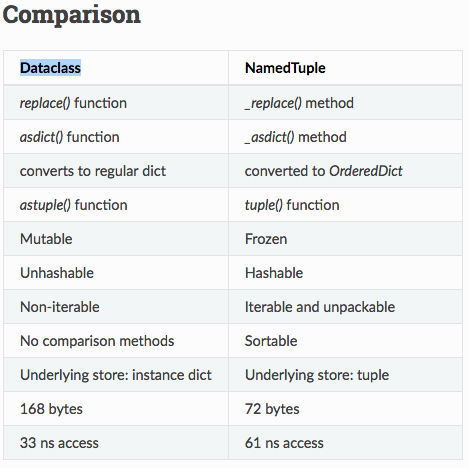

## `@memoryview`